### Play around with the twolayer slab model to make an emission line with absorption

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd
from astropy.convolution import convolve

import sys
sys.path.append('/Users/jpw/py/spectools_ir/')
from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.slabspec.slabspec import _spec_convol_klaus
import slabspec_absorption

%matplotlib widget
#%matplotlib inline

In [2]:
hitran_CO10 = extract_hitran_data('CO', 4.58, 5.2, vup=1)
hitran_CO21 = extract_hitran_data('CO', 4.58, 5.2, vup=2)
hitran_13CO10 = extract_hitran_data('CO', 4.58, 5.2, vup=2)

In [3]:
start_time = timeit.default_timer()

# slab model parameters
N = 1e21        # total column density of molecule (not H2) in the absorbing layer in m^-2
T = 300         # temperature of back layer in K
fwhm = 15       # fwhm of absorbing layer in km/s
X13 = 1/60      # 13CO/CO ratio
continuum = 1.0 # continuum flux in Jy

spec_CO10 = slabspec_absorption.make_spec_absorption('CO', N, T, 0, fwhm, continuum, wmin=4.58, wmax=5.2, d_pc=140., res=1e-5, vup=1)

elapsed = timeit.default_timer() - start_time
print(f'Model took {elapsed:5.2f} seconds')

               , 5.1887, 0.000
               , 5.1745, 0.000
               , 5.1605, 0.000
               , 5.1465, 0.000
               , 5.1328, 0.000
               , 5.1191, 0.000
               , 5.1057, 0.000
               , 5.0924, 0.000
               , 5.0792, 0.000
               , 5.0661, 0.000
               , 5.0532, 0.000
               , 5.0405, 0.000
               , 5.0279, 0.000
               , 5.0154, 0.000
               , 5.0031, 0.000
               , 4.9908, 0.000
               , 4.9788, 0.000
               , 4.9668, 0.000
               , 4.9550, 0.001
               , 4.9434, 0.001
               , 4.9318, 0.002
               , 4.9204, 0.003
               , 4.9091, 0.005
               , 4.8980, 0.008
               , 4.8869, 0.012
               , 4.8760, 0.017
               , 4.8652, 0.024
               , 4.8546, 0.034
               , 4.8440, 0.047
               , 4.8336, 0.063
               , 4.8233, 0.082
               , 4.8131, 0.106
        

In [4]:
# normalize by the continuum - in principle constrained by obs but here a free (fudge) parameter
#scale = 5.0
wave_model = spec_CO10['spectrum']['wave']
#flux_model = 1 + scale * spec_CO10['spectrum']['flux']
flux_model = spec_CO10['spectrum']['flux']

# final step is to convolve to the resolving power of the data
R = 25000
#flux_model_R = _spec_convol_klaus(wave_model, flux_model, R)

Text(0, 0.5, 'Flux [Jy]')

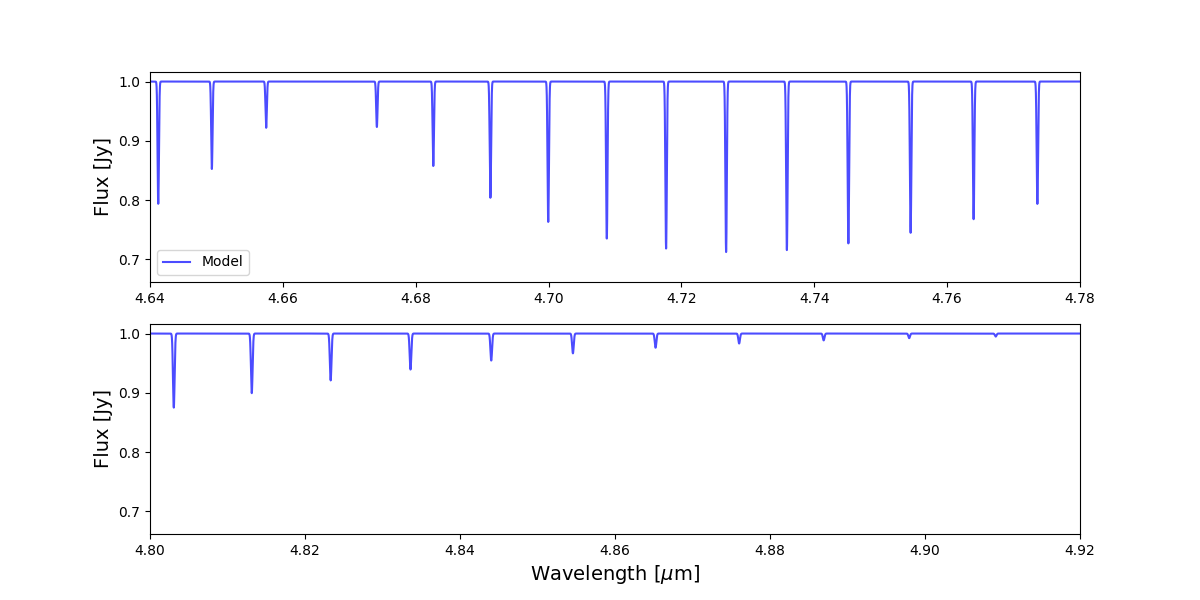

In [5]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(211)
#ax1.plot(wave, flux, color='gray', label='Data')
#ax1.plot(wave_model, flux_model_R, color='blue', label='Model', alpha=0.7)
ax1.plot(wave_model, flux_model, color='blue', label='Model', alpha=0.7)
wmin, wmax = 4.64, 4.78
ax1.set_xlim(wmin, wmax)
ax1.set_ylabel('Flux [Jy]', fontsize=14)
ax1.legend()

ax2 = fig.add_subplot(212)
#ax2.plot(wave, flux, color='gray', label='Data')
#ax2.plot(wave_model, flux_model_R, color='blue', label='Model', alpha=0.7)
ax2.plot(wave_model, flux_model, color='blue', label='Model', alpha=0.7)
wmin, wmax = 4.80, 4.92
ax2.set_xlim(wmin, wmax)
ax2.set_xlabel('Wavelength [$\mu$m]', fontsize=14)
ax2.set_ylabel('Flux [Jy]', fontsize=14)

#plt.savefig('test_fit.png')